# Spec_Tools Tutorial

This is a small showcase of all the tools in the spec_tools python package which should aid the analysis of IR spectra using Python

# Modules

-spectra_plot a variety of functions to plot an visualize
-baseline_fitting contains some methode for the fitting of baselines to a given spectrum



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pybaselines import Baseline, utils
from modules import spec_tools, spectra_plotting

# Tutorial: How to Plot Spectra

Loading of the data can be done with the **data_read_csv()** function contained in the spec_tools module



In [63]:
data, data_np = spec_tools.data_read_csv("shee2.csv",sep=";",comma=",", header=2)

print(data_np.shape)

(57813, 4)


### Simple Spectrum Plot:

For this the Function **plot_specta** from the spectra_plotting toolbox can be used

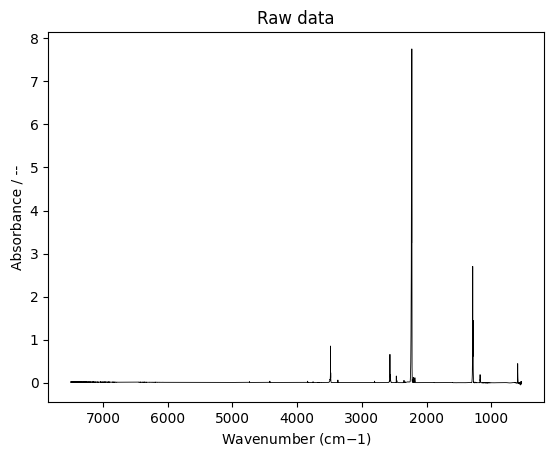

In [64]:
spectra_plotting.plot_spectra(data_np[:,0],data_np[:,1],title="Raw data")


### Overlay different spectra

To overlay different spectra one can:

+ Load in the Data 
+ Combine Data in a array
+ Add annotations



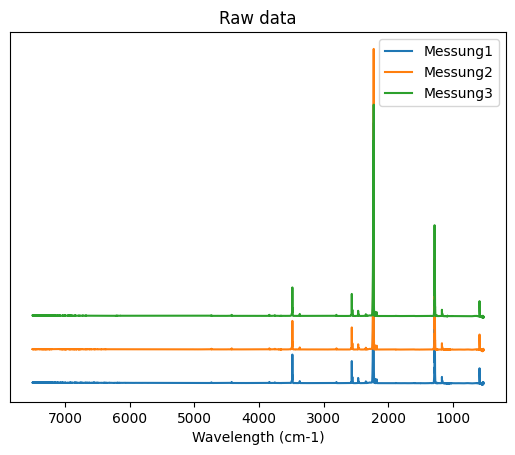

In [65]:
data, data_np = spec_tools.data_read_csv("shee2.csv",sep=";",comma=",")

annotations = ["Messung1","Messung2", "Messung3"]

spectra_plotting.overlay_spectra(data_np, title="Raw data",annotations=annotations,y_axis=False, shift=1)



### Plot Multiple Spectra Windows:

For this the function **plot_multiple_spectral_window()** can be used



AttributeError: 'numpy.ndarray' object has no attribute 'plot'

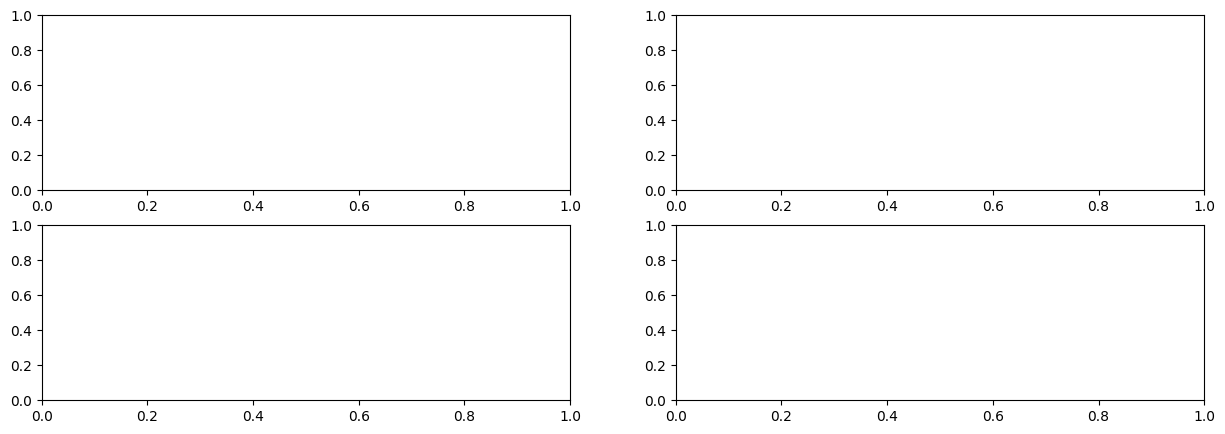

In [84]:
def plot_multiple_spectral_window(x,y,spectral_windows, title, cols = 2):
    """ 
    Plots multiple selected spectral windows in a side by side plot

    Parameters:
        x (np.array): x values of the spectra
        y (np.array): y values of the spectra
        spectral_windows (list): list of spectral windows to plot
        title (str): title of the plot
        cols (int): number of columns in the plot

    """
    num_windows = len(spectral_windows)
    rows = (num_windows + cols -1 ) // cols


    fig, ax = plt.subplots(rows,cols,figsize=(15,5))
    for i in range(num_windows):
        mask = np.logical_and(x >=spectral_windows[i][0], x < spectral_windows[i][1])
        x_mask = x[mask]
        y_mask = y[mask]
        ax[i].plot(x_mask,y_mask)
        ax[i].set_title(f"Spectral window ({spectral_windows[i][0]}-{spectral_windows[i][1]})")
        ax[i].set_xlabel("Wavelength / (cm-1)")
        ax[i].invert_xaxis()
plot_multiple_spectral_window(data_np[:,0],data_np[:,1],[[3000,3600],[4000,4500],[2000,2500], [2100,2200]],"Selected spectral windows", cols=2)
